<a href="https://colab.research.google.com/github/satishchaudhary382/RFM/blob/master/Strategy-v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [582]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import pandas_ta as ta
import pandas_datareader as pdr

In [583]:
# df = pdr.get_data_yahoo("WMT","2019-01-01","2020-01-01")
df = pd.read_csv("/content/uic.txt")
df.set_index(['Date'],inplace = True)

In [584]:
long = ( ta.ema(df.Close.shift(-2), 7)-ta.ema(df.Close, 21)) > 0
# # long = ta.increasing(ta.wma(df.Close, 50))
# long = ta.macd(df.Close).iloc[:,1] > 0
df['wma8'] = ta.hma(df.Close, 8, append = True)
df['wma21'] = ta.hma(df.Close, 21, append = True)
df['wma50'] = ta.hma(df.Close, 50, append = True)


In [585]:
trendy = df.ta.trend_return(trend=long, cumulative=True)
trendy.tail() 

,CLTR,TR_LOGRET,CLTR_Trends,CLTR_Trades
date,,,,
2020-10-18,0.0,0.0,0,0
2020-10-19,0.0,0.0,0,0
2020-10-20,0.0,0.0,0,0
2020-10-21,0.0,0.0,0,0
2020-10-22,0.0,0.0,0,0


In [586]:
# df.columns

In [587]:
# chart_ = df[["close", "wma8", "wma21", "wma50"]]
# chart_.plot(figsize=(20,10), grid=True)

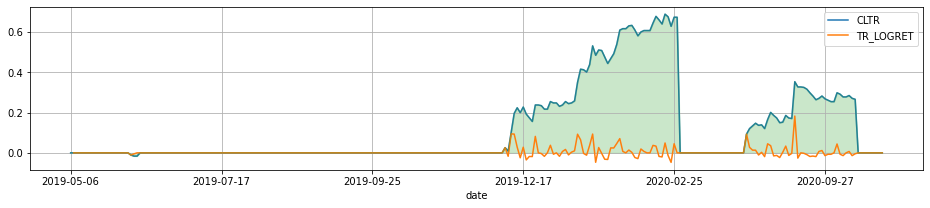

In [588]:
cltr = trendy.iloc[:,0]
tr = trendy.iloc[:,1]

trendy.iloc[:,:2].plot(figsize=(16, 3))
cltr.plot(figsize=(16, 3), kind="area", stacked=False, alpha=0.25, grid=True)

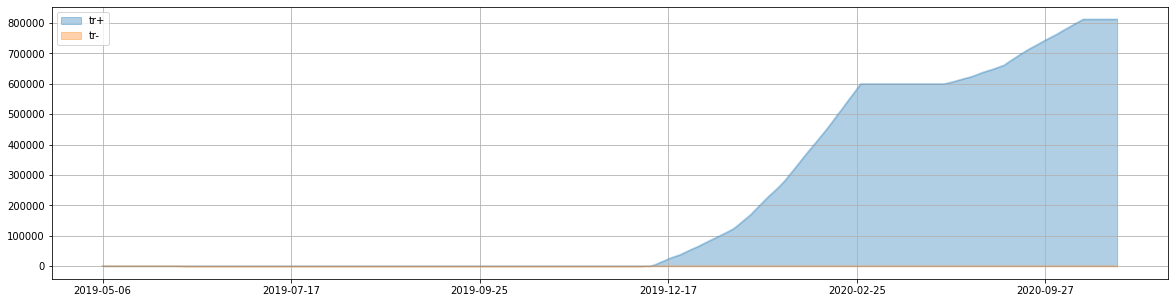

In [589]:

capital = 25000

total_return = cltr.cumsum() * capital
positive_return = total_return[total_return > 0]
negative_return = total_return[total_return <= 0]
trdf = pd.DataFrame({"tr+": positive_return, "tr-": negative_return})
trdf.plot(figsize=(20, 5), kind="area", stacked=False, alpha=0.35, grid=True)

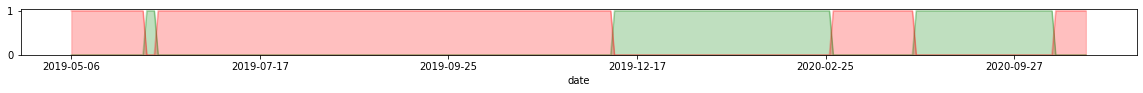

In [590]:
long_trend = (trendy.iloc[:,-2] > 0).astype(int)
short_trend = (1 - long_trend).astype(int)

long_trend.plot(figsize=(20, 0.85), kind="area", color = 'green',stacked=True, alpha=0.25)
short_trend.plot(figsize=(20, 0.85), kind="area", color = 'red', stacked=True,  alpha=0.25)

In [591]:
entries = (trendy.iloc[:,-1] > 0).astype(int) * df.close
entries[entries < 0.0001] = np.nan
entries.name = "Entry"


exits = (trendy.iloc[:,-1] < 0).astype(int) * df.close
exits[exits < 0.0001] = np.nan
exits.name = "Exit"

total_trades = trendy.iloc[:,-1].abs().sum()
print(f"Total Trades: {total_trades}")

all_trades = trendy.iloc[:,-1].copy().fillna(0)
all_trades = all_trades[all_trades != 0]

trades = pd.DataFrame({"Signal": all_trades, entries.name: entries.dropna(), exits.name: exits.dropna()})
trades

Total Trades: 6


,Signal,Entry,Exit
2019-06-02,1,996.0,NaN
2019-06-06,-1,NaN,980.0
2019-12-08,1,231.0,NaN
2020-02-26,-1,NaN,453.0
2020-07-06,1,328.0,NaN
2020-10-11,-1,NaN,428.0


In [592]:
# first_date, last_date = df.index[0], df.index[-1]
# f_date = f"{first_date.day_name()} {first_date.month}-{first_date.day}-{first_date.year}"
# l_date = f"{last_date.day_name()} {last_date.month}-{last_date.day}-{last_date.year}"
# last_ohlcv = f"Last OHLCV: ({df.iloc[-1].open}, {df.iloc[-1].high}, {df.iloc[-1].low}, {df.iloc[-1].close}, {int(df.iloc[-1].volume)})"
# ptitle = f"from {f_date} to {l_date}\n{last_ohlcv}"

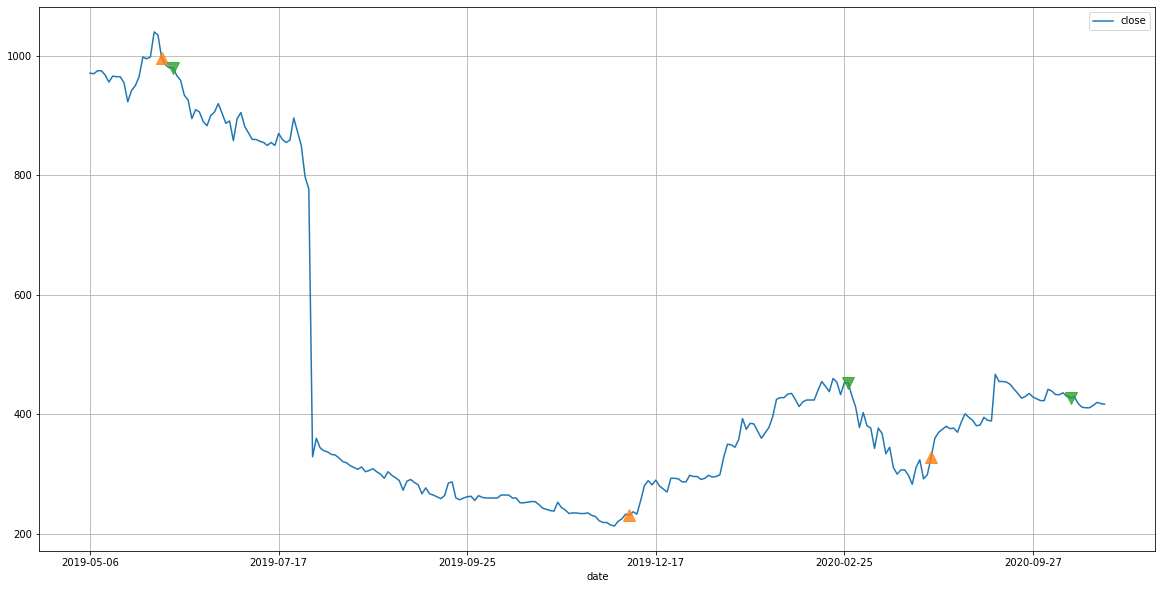

In [593]:
chart = df[["close"]]#, "wma8", "wma21", "wma50"]]
chart.plot(figsize=(20, 10),  grid=True)
entries.plot(figsize=(20, 10), marker="^", markersize=12, alpha=0.8)
exits.plot(figsize=(20, 10),  marker="v", markersize=12, alpha=0.8, grid=True)